In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [5]:
# Load the MNIST Fashion dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

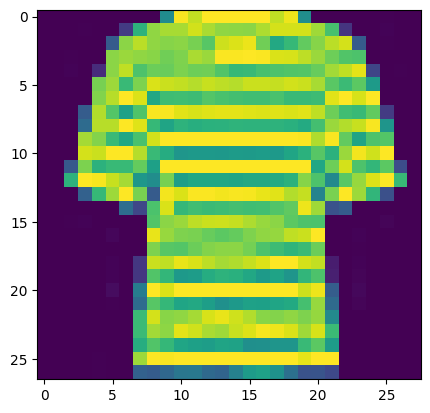

In [6]:
import random
i = random.randint(0,60001) 
plt.imshow(train_images[i,1:])

In [7]:
# Preprocess the data
train_images = train_images.reshape((-1, 28, 28, 1)) / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)) / 255.0

In [8]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 36s 92ms/step - loss: 0.5889 - accuracy: 0.7910 - val_loss: 0.4022 - val_accuracy: 0.8598
Epoch 2/10
375/375 [==============================] - 34s 92ms/step - loss: 0.3803 - accuracy: 0.8629 - val_loss: 0.3818 - val_accuracy: 0.8664
Epoch 3/10
375/375 [==============================] - 34s 91ms/step - loss: 0.3380 - accuracy: 0.8798 - val_loss: 0.3441 - val_accuracy: 0.8763
Epoch 4/10
375/375 [==============================] - 35s 94ms/step - loss: 0.3069 - accuracy: 0.8899 - val_loss: 0.3020 - val_accuracy: 0.8928
Epoch 5/10
375/375 [==============================] - 40s 106ms/step - loss: 0.2829 - accuracy: 0.8980 - val_loss: 0.2914 - val_accuracy: 0.8953
Epoch 6/10
375/375 [==============================] - 33s 89ms/step - loss: 0.2668 - accuracy: 0.9041 - val_loss: 0.3060 - val_accuracy: 0.8908
Epoch 7/10
375/375 [==============================] - 34s 90ms/step - loss: 0.2490 - accuracy: 0.9089 - val_loss: 0.2719 - val_accuracy

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 [==============================] - 3s 10ms/step - loss: 0.2647 - accuracy: 0.9056
Test Loss: 0.2646852433681488
Test Accuracy: 0.9056000113487244


In [12]:
# Make predictions on the test data
predictions = model.predict(test_images)

313/313 [==============================] - 2s 8ms/step


In [13]:
# Convert predictions to class labels
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

In [14]:
# Print predicted labels for the first few test samples
for i in range(10):
    print("Predicted label:", predicted_labels[i])
    print("True label:", test_labels[i])
    print()

Predicted label: 9
True label: 9

Predicted label: 2
True label: 2

Predicted label: 1
True label: 1

Predicted label: 1
True label: 1

Predicted label: 6
True label: 6

Predicted label: 1
True label: 1

Predicted label: 4
True label: 4

Predicted label: 6
True label: 6

Predicted label: 5
True label: 5

Predicted label: 7
True label: 7

